## Question 2_3a 

In [2]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union



Attaching package: 'pracma'


The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu




In [6]:
set.seed(1)
g1 = barabasi.game(1000, m = 4, directed = TRUE)
g2 = barabasi.game(1000, m = 4, directed = TRUE)
permuted_g2 = permute(g2, sample(vcount(g2)))
g = add_edges(g1, c(t(as_edgelist(permuted_g2))))

In [30]:
create_transition_matrix = function (g){
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  
    z = matrix(rowSums(adj, , 1))
    transition_matrix = adj / repmat(z, 1, n)
    return(transition_matrix)
}
random_walk_custom = function (g, num_steps, start_node, transition_matrix = NULL, alpha=0.0, visit_mode="equal"){
    if(is.null(transition_matrix)){
            transition_matrix = create_transition_matrix(g) 
    }
    v = start_node
    visited_nodes = array(data=0.0, length(num_steps))
    if(visit_mode == 'equal'){
        visit_probs=array(1/vcount(g), vcount(g))
    }
    else if (visit_mode == "page_rank"){
        pr = page_rank(g, directed=TRUE)$vector
        visit_probs= pr/sum( pr)
    }
    else if (visit_mode == "page_rank_median"){
        pr = page_rank(g, directed=TRUE)$vector
        df = data.frame("idx"=1:vcount(g), "val"=pr)
        df=df[order(df$val),]
        visit_probs=array(0, vcount(g))
        visit_probs[df$idx[(vcount(g) %/% 2):((vcount(g) %/% 2)+1)]]=0.5   
        #print(df$idx[(vcount(g) %/% 2):((vcount(g) %/% 2)+1)])
    }
    else{
        visit_probs=array(1/vcount(g), vcount(g))
    }
    for(i in 1:num_steps){
        if(runif(1)<alpha){
            v = sample(1:vcount(g), 1, prob = visit_probs)   
        }
        else{
            PMF = transition_matrix[v, ]
            v = sample(1:vcount(g), 1, prob = PMF) 
        }
        visited_nodes[i] = v
    }  
    return(visited_nodes)
}

[1] "Pearson correlation coefficient: 0.902691"
[1] "Slope and intercept:"

Call:
lm(formula = node_prob ~ degree(g))

Coefficients:
(Intercept)    degree(g)  
 -0.0015319    0.0001586  



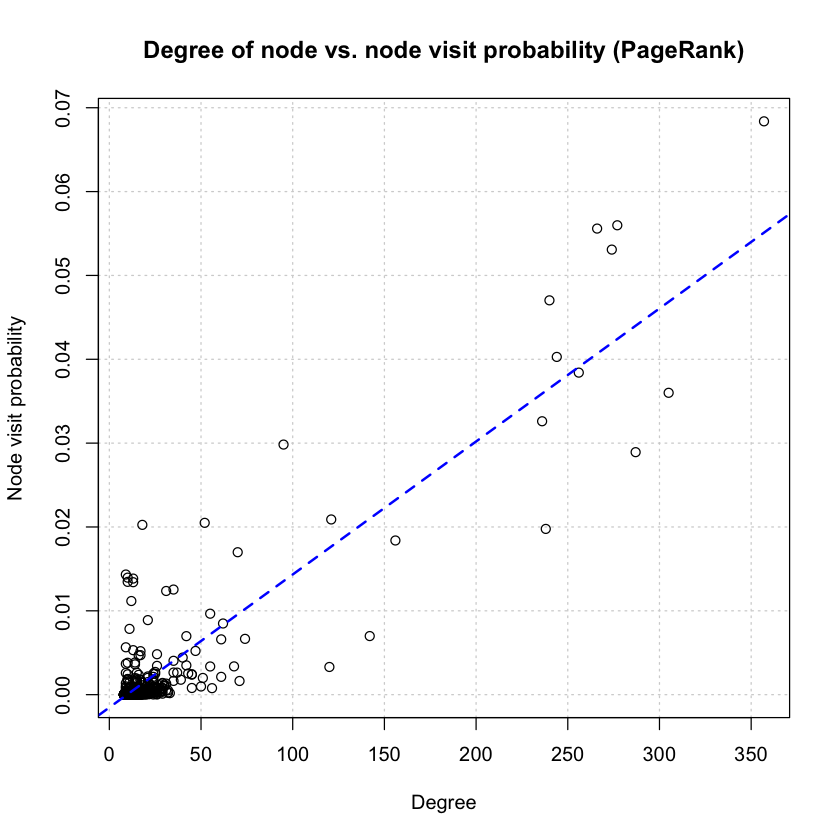

In [15]:
num_steps = 1000
visited_counts = array(data=0.0, vcount(g))
stable_step = ceiling(log(vcount(g)))
for(i in 1:100){
    start = sample(1:vcount(g), 1)
    visited_nodes = random_walk_custom(g = g,num_steps = num_steps,transition_matrix = NULL,start_node = start,alpha = 0.0,visit_mode = 'equal')
    for (j in (stable_step+1):length(visited_counts)) {
        visited_counts[visited_nodes[j]] = visited_counts[visited_nodes[j]] + 1
    }
}
node_prob = visited_counts / ((num_steps-stable_step) * 100)

[1] "Pearson correlation coefficient: 0.902691"
[1] "Slope and intercept:"

Call:
lm(formula = node_prob ~ degree(g))

Coefficients:
(Intercept)    degree(g)  
 -0.0015319    0.0001586  



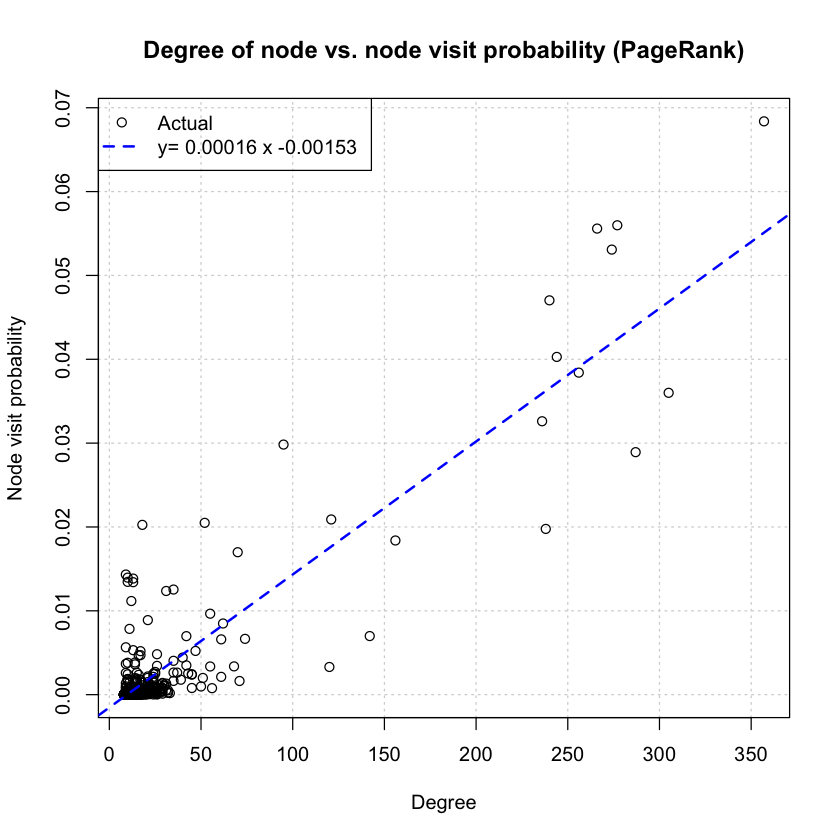

In [22]:
plot(degree(g), node_prob , xlab='Degree', ylab='Node visit probability',main="Degree of node vs. node visit probability (PageRank)",grid())
abline(lm(node_prob ~ degree(g)),col="blue",lwd=2,lty=2)
linear_reg = lm(node_prob ~ degree(g))$coefficients
str = paste('y=',round(linear_reg[2],5), 'x', round(linear_reg[1],5))
legend('topleft', legend = c("Actual",str),
       lty = c(NA, 2), lwd = c(1,2), pch=c(1,NA),
       col = c('black','blue'))
print(sprintf("Pearson correlation coefficient: %f",cor(degree(g), node_prob)))
print("Slope and intercept:")
print(lm(node_prob ~ degree(g)))

## Question 2_3b

[1] "Pearson correlation coefficient: 0.928596"
[1] "Slope and intercept:"

Call:
lm(formula = node_prob ~ degree(g))

Coefficients:
(Intercept)    degree(g)  
 -0.0011004    0.0001316  



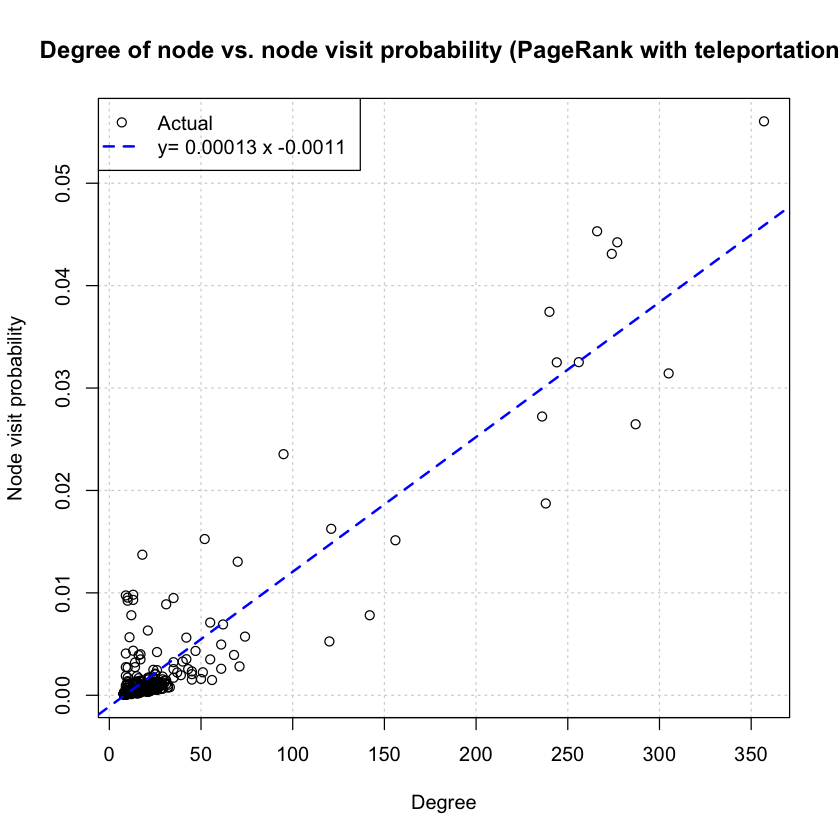

In [24]:
num_steps = 1000
visited_counts = array(data=0.0, vcount(g))
stable_step = ceiling(log(vcount(g)))
for(i in 1:100){
    start = sample(1:vcount(g), 1)
    visited_nodes = random_walk_custom(g = g,num_steps = num_steps,transition_matrix = NULL,start_node = start,alpha = 0.15,visit_mode = 'equal')
    for (j in (stable_step+1):length(visited_counts)) {
        visited_counts[visited_nodes[j]] = visited_counts[visited_nodes[j]] + 1
    }
}
node_prob = visited_counts / ((num_steps-stable_step) * 100)
plot(degree(g), node_prob , xlab='Degree', ylab='Node visit probability',main="Degree of node vs. node visit probability (PageRank with teleportation)",grid())
abline(lm(node_prob ~ degree(g)),col="blue",lwd=2,lty=2)
linear_reg = lm(node_prob ~ degree(g))$coefficients
str = paste('y=',round(linear_reg[2],5), 'x', round(linear_reg[1],5))
legend('topleft', legend = c("Actual",str),
       lty = c(NA, 2), lwd = c(1,2), pch=c(1,NA),
       col = c('black','blue'))
print(sprintf("Pearson correlation coefficient: %f",cor(degree(g), node_prob)))
print("Slope and intercept:")
print(lm(node_prob ~ degree(g)))

## Question 2_4a

[1] "Pearson correlation coefficient: 0.909724"
[1] "Slope and intercept:"

Call:
lm(formula = node_prob ~ degree(g))

Coefficients:
(Intercept)    degree(g)  
  -0.001458     0.000154  



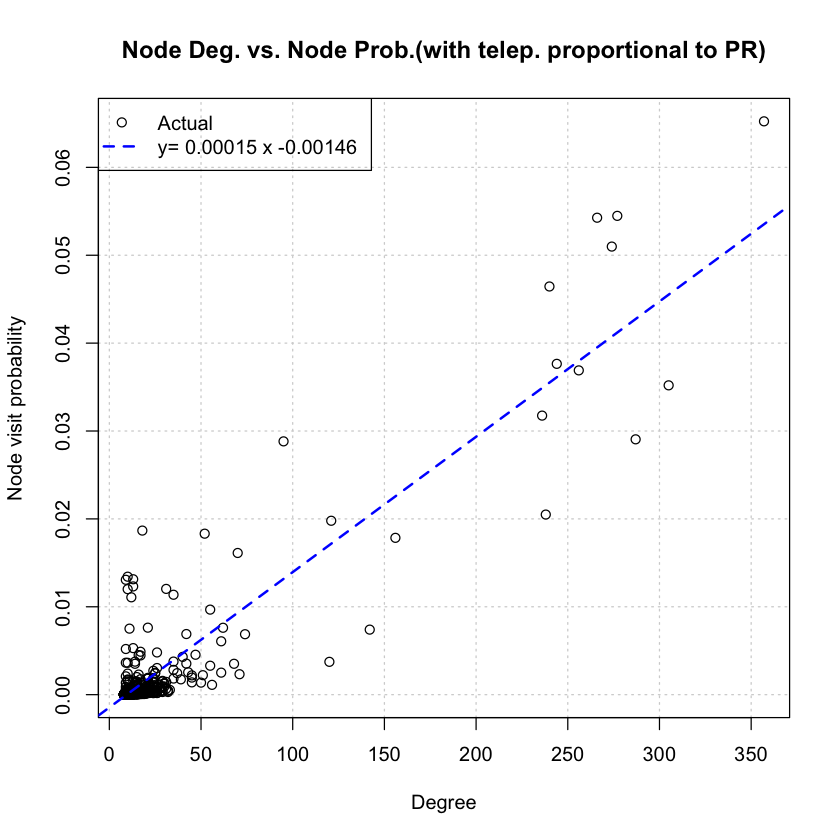

In [26]:
num_steps = 1000
visited_counts = array(data=0.0, vcount(g))
stable_step = ceiling(log(vcount(g)))
for(i in 1:100){
    start = sample(1:vcount(g), 1)
    visited_nodes = random_walk_custom(g = g,num_steps = num_steps,transition_matrix = NULL,start_node = start,alpha = 0.15,visit_mode = 'page_rank')
    for (j in (stable_step+1):length(visited_counts)) {
        visited_counts[visited_nodes[j]] = visited_counts[visited_nodes[j]] + 1
    }
}
node_prob = visited_counts / ((num_steps-stable_step) * 100)
plot(degree(g), node_prob , xlab='Degree', ylab='Node visit probability',main="Node Deg. vs. Node Prob.(with telep. proportional to PR)",grid())
abline(lm(node_prob ~ degree(g)),col="blue",lwd=2,lty=2)
linear_reg = lm(node_prob ~ degree(g))$coefficients
str = paste('y=',round(linear_reg[2],5), 'x', round(linear_reg[1],5))
legend('topleft', legend = c("Actual",str),
       lty = c(NA, 2), lwd = c(1,2), pch=c(1,NA),
       col = c('black','blue'))
print(sprintf("Pearson correlation coefficient: %f",cor(degree(g), node_prob)))
print("Slope and intercept:")
print(lm(node_prob ~ degree(g)))

## Question 2_4b

[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 705 586
[1] 

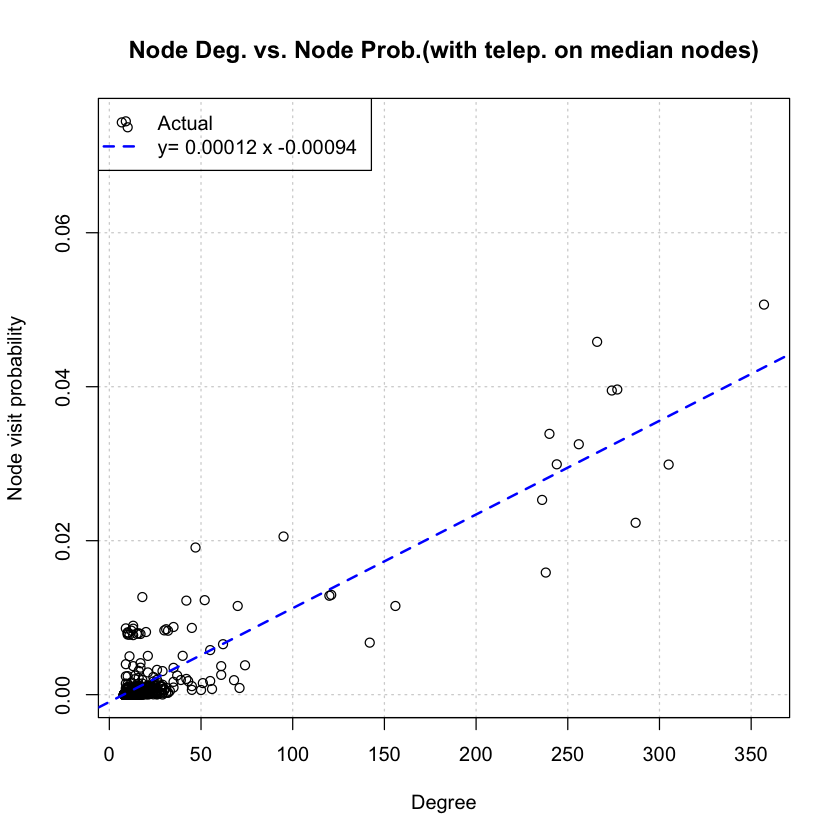

In [31]:
num_steps = 1000
visited_counts = array(data=0.0, vcount(g))
stable_step = ceiling(log(vcount(g)))
for(i in 1:100){
    start = sample(1:vcount(g), 1)
    visited_nodes = random_walk_custom(g = g,num_steps = num_steps,transition_matrix = NULL,start_node = start,alpha = 0.15,visit_mode = 'page_rank_median')
    for (j in (stable_step+1):length(visited_counts)) {
        visited_counts[visited_nodes[j]] = visited_counts[visited_nodes[j]] + 1
    }
}
node_prob = visited_counts / ((num_steps-stable_step) * 100)
plot(degree(g), node_prob , xlab='Degree', ylab='Node visit probability',main="Node Deg. vs. Node Prob.(with telep. on median nodes)",grid())
abline(lm(node_prob ~ degree(g)),col="blue",lwd=2,lty=2)
linear_reg = lm(node_prob ~ degree(g))$coefficients
str = paste('y=',round(linear_reg[2],5), 'x', round(linear_reg[1],5))
legend('topleft', legend = c("Actual",str),
       lty = c(NA, 2), lwd = c(1,2), pch=c(1,NA),
       col = c('black','blue'))
print(sprintf("Pearson correlation coefficient: %f",cor(degree(g), node_prob)))
print("Slope and intercept:")
print(lm(node_prob ~ degree(g)))

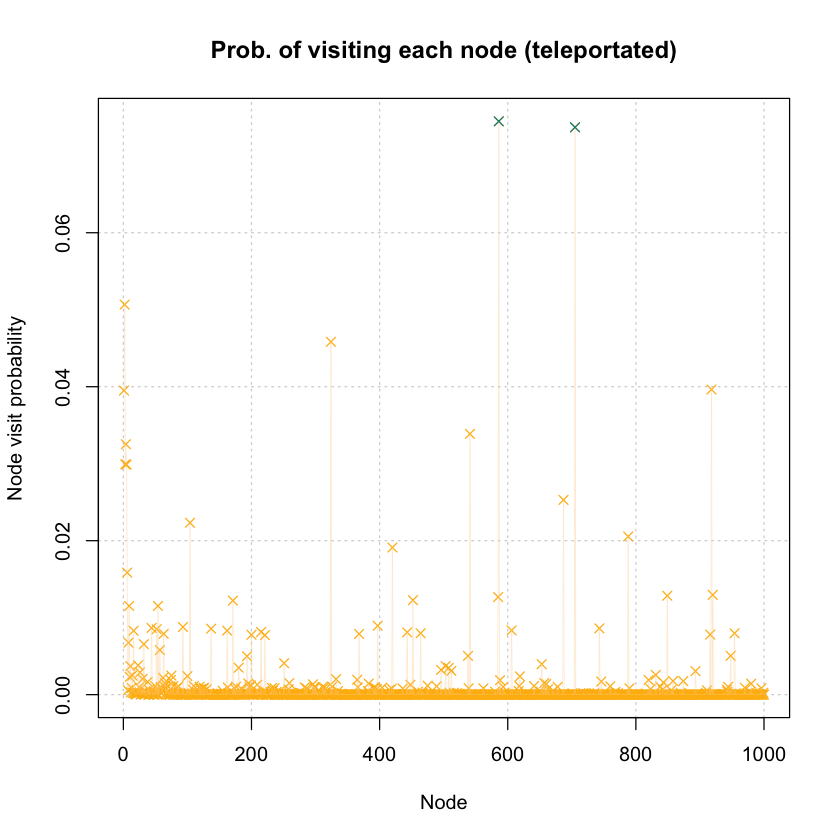

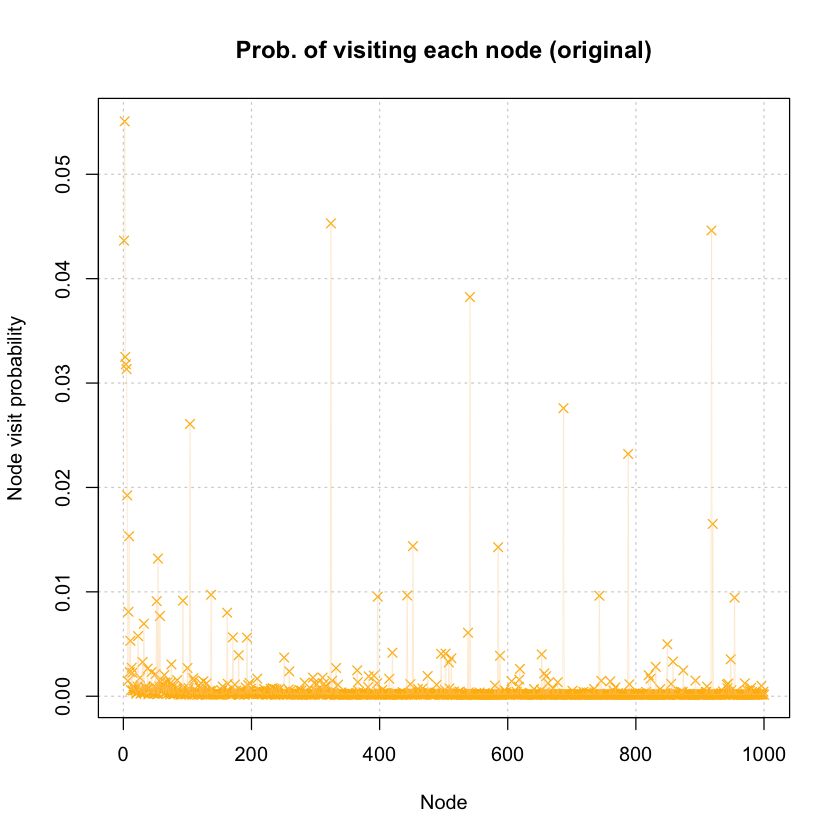

In [33]:
plot(seq(1,1000,1),node_prob,pch=4, xlab='Node', ylab='Node visit probability',main='Prob. of visiting each node (teleportated)',col='darkgoldenrod1',grid())
lines(node_prob,lwd=0.3,col="burlywood1")
points(705, node_prob[705], col = "darkcyan", pch=4)
points(586, node_prob[586], col = "darkcyan",pch=4)
pageranks = page_rank(g)$vector
plot(seq(1,1000,1),pageranks,pch=4, xlab='Node', ylab='Node visit probability',main='Prob. of visiting each node (original)',col='darkgoldenrod1',grid())
lines(pageranks,lwd=0.3,col="burlywood1")